<a href="https://colab.research.google.com/github/joyinning/python_lie_detection/blob/main/sentiment_classification_vs_lie_detection_with_results__nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Information**

**1) Background** <br>
There are many machine learning solutions to detect if a person is lying or not. 

What is **Sentiment Classification**?
- It analyzes the sentiment or emotional tone using text data, such as a review, and determines whether it is positive, negative, or neutral. 
- It is used for understanding the overall sentiment expressed in the text. 

What is **Lie Detection**?
- It involves identifying whether a statement is true or false. 
- It is used for detecting whether the texts are accuract or not, analyzing the factual things made in the text.

**2) Goal** <br>
The goal of this research is as follows.
- To build sentiment classification and lie detection using the reviews of hotels in the United States.
- To understand the difference between sentiment classification and lie detection and conclude which model can make a better performance.
> While sentiment classification and lie detection both analyze text data, they are fundamentally using different features. 
> > In other words, Sentiment classification focuses on emotions and opinions, while lie detection focuses on the accuracy of factual claims. 
- To calculate gain ratio scores and select the top features.

**3) Research Process** <br>
The research will be conducted as the following process.

1. **Data Preprocessing** <br>
Upload, clean, (transform, if needed), and explore the data set to decide which values we should use to build an algorithm.

2. **Text Preprocessing** <br>
Clean and preprocess the review data by tokenizing, removing stop words and punctuations, converting to lowercase, lemmitizing, and stemming for setting the reviews for the required form of models of NLP. 

3. **Vectorization and Feature Selection** <br>
Vectorize the preprocessed text data and select the top 15 features using gain ratio scores.

4. **Building the Sentiment Classification and Lie Detection Model** <br>
Split the dataset into training and testing sets, train a machine learning algorithm such as MultinomialNB, SVM, Decision Tree, and Random Forest, evaluate the models, and conduct hyperparameter tuning for improvements, if needed. 

5. **Evaluating the Models** <br>
Compare the results of each algorithm and think about the nest step for improvements of those models. 

## **2. Data Preprocessing**

This step is for preparing and exploring the given data set (the reviews of US hotels) for further machine learning research. 

### **1) Upload the data set**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
review = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IST 707/us_hotel_review.csv")

### **2) EDA**

**Basic Information of the Data Structure**

The data set, '`review`' has 35,437 reviews with the following three attributes.
1. **`is_positive`**: whether the review is positive or negative (positive = '`y`', negative = '`n`')
2. **`Reviewer_score`**: the review score (10 points scale)
3. **`review`**: actual reviews, string values

In [3]:
review.shape

(35437, 3)

In [4]:
review.head()

,is_positive,Reviewer_Score,review
0,y,8.3,The bathroom in our room was a black glass bo...
1,y,8.3,We had 2 different rooms here and both were d...
2,n,4.2,Our bathroom had an urine order Shower was ve...
3,y,7.9,The rooms were cold Although nice the room de...
4,n,3.3,The service was awful They refused to take ow...


**Handling Missing Values**

There are no missing values in all attributes.

In [5]:
review.isna().sum()

is_positive       0
Reviewer_Score    0
review            0
dtype: int64

**Value Transformation** <br>
For further modeling, convert the character values in **`is_positive`** to numeric values.
- positive ('y') = 1
- negative ('n') = 0

In [6]:
review = review.replace('y', 1)
review = review.replace('n', 0)

## **3. Text Preprocessing**

**1) Upload Required Classifiers for Text Preprocessing**

Before text preprocessing, upload the following necessary classifiers in this environment. 
- Sentence Tokenizer
- Stopwords
- RegexpTokenizer
- WordNetLemmatizer
- PorterStemmer

In [7]:
# sent_tokenize
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
# stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# RegexpTokenizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
regexp_tokenizer = RegexpTokenizer('[\'a-zA-Z]+')

In [10]:
# WordNetLemmatizer and PorterStemmer
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, PorterStemmer
wordnet_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


**2) Define a Function for Text Preprocessing** <br>
For convenience, make a customized function to conduct text preprocessing that includes the above required tools.

In [11]:
import re 
def text_preprocess(document, rebuild_document = True):
  words = []

  for sentence in sent_tokenize(document):
    tokens = [wordnet_lemmatizer.lemmatize(t.lower()) for t in regexp_tokenizer.tokenize(sentence) if t.lower() not in stop_words]
    words += tokens
  if rebuild_document:
    content = ' '.join(words).strip()
    content = content.replace(r"'"," ")
    content = re.sub('s\+', ' ', content)
    content = content.strip()

    return content
  else:

    return words

**3) Implement Text Preprocessing**

Create new lists of review texts, tokenized review texts, and sentiment labels to split the review text data into predictive and target variables. 

In [12]:
X_reviews = [] # review texts after text preprocessing
X_token_reviews = [] # tokenized review texts after text preprocessing
Y_reviews = [] # sentiment labels

Run a for loop to divide the data set and append values into the new lists.

In [13]:
for index, row in review.iterrows():
  sentiment_index = row.is_positive
  review = row.review

  X_reviews.append(text_preprocess(review))
  X_token_reviews.append(text_preprocess(review, False))
  Y_reviews.append(sentiment_index)

Check the samples of new lists.

In [14]:
print('X_reviews: ', X_reviews[0])

X_reviews:  bathroom room black glass box theory cool practice leaf lot desired little privacy enough light mirror shower leaked hall however allow loft space desk chair second tv great location park near museum restaurant perfect launch pad many walking day trip beautiful old building former orphanage spacious room big breakfast spread perfect starting day right friendly helpful staff


In [15]:
print('X_token_reviews: ', X_token_reviews[0])

X_token_reviews:  ['bathroom', 'room', 'black', 'glass', 'box', 'theory', 'cool', 'practice', 'leaf', 'lot', 'desired', 'little', 'privacy', 'enough', 'light', 'mirror', 'shower', 'leaked', 'hall', 'however', 'allow', 'loft', 'space', 'desk', 'chair', 'second', 'tv', 'great', 'location', 'park', 'near', 'museum', 'restaurant', 'perfect', 'launch', 'pad', 'many', 'walking', 'day', 'trip', 'beautiful', 'old', 'building', 'former', 'orphanage', 'spacious', 'room', 'big', 'breakfast', 'spread', 'perfect', 'starting', 'day', 'right', 'friendly', 'helpful', 'staff']


In [16]:
print('Y_reviews: ', Y_reviews[0:10])

Y_reviews:  [1, 1, 0, 1, 0, 1, 0, 1, 1, 1]


## **4. Vectorization & Feature Selection**

There are two techniques that will be used in this step: Count Vectorizer and TD-IDF.

What is **Count Vectorization**?
- It counts the frequency of each word in a document.
- It shows a document as **a vector of word frequencies**. 

What is **TD-IDF**?
- It takes into account both the frequency of a word in a document and the quality (states or facts) across all documents. 
- It represents **a document as a vector of weights** that represent the importance of each word in the document and in the corpus. 

**4-1) Count Vectorization**

**1) Import the Required Classifier**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

**2) Transform `X_reviews` Using Count Vectorization Classifier**

In [18]:
X_reviews_cv = count_vectorizer.fit_transform(X_reviews)

**3) Calculate the Gain Ratio for Selecting Features** <br>
Compute the **gain ratio** of each feature from the data set after running count vectorization. <br>
The **gain ratio** will be a standard of feature selection.

In [19]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

mi_cv = mutual_info_classif(X_reviews_cv, Y_reviews)
feature_scores_cv = mi_cv / np.log2(X_reviews_cv.shape[1])

**4) Select Top 15 Features** <br>
Select top 15 features based on the gain ratio scores.

In [20]:
# Find the name of features
feature_names_cv = count_vectorizer.get_feature_names_out()

In [21]:
# Select the top 15 features using gain ratios
k = 15
top_index_cv = np.argsort(feature_scores_cv)[-k:]
top_names_cv = [feature_names_cv[i] for i in top_index_cv]
top_scores_cv = [feature_scores_cv[i] for i in top_index_cv]

The set of top 15 features from the reviews after count vectorization includes words that express sentiments as follows. 
- **Positive**: positive, great, excellent, helpful, confortable, friendly
- **Negative**: negative, rude, horrible, never, bad, poor

In [22]:
# Display the selected features and their gain ratio scores
pd.DataFrame({'Features': top_names_cv, 'Scores' : top_scores_cv}).sort_values('Scores', ascending = False).reset_index().drop(labels='index',axis=1)

,Features,Scores
0,positive,0.000511
1,negative,0.000491
2,great,0.000345
3,rude,0.000311
4,dirty,0.000269
5,room,0.000213
6,excellent,0.000199
7,helpful,0.000190
8,horrible,0.000180
9,never,0.000173


**4-2) TD-IDF**


**1) Import the Required Classifier**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdidf = TfidfVectorizer()

**2) Transform `X_reviews` Using TD-IDF Classifier**

In [24]:
X_reviews_tdidf = tdidf.fit_transform(X_reviews)

**3) Calculate the Gain Ratio for Selecting Features** <br>
Compute the gain ratio of each feature from the data set after running TD-IDF Vectorization. <br>
The gain ratio will be a standard of feature selection.

In [25]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

mi_tdidf = mutual_info_classif(X_reviews_tdidf, Y_reviews)
feature_scores_tdidf = mi_tdidf / np.log2(X_reviews_tdidf.shape[1])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.

**4) Select Top 15 Features** <br>
Select top 15 features based on the gain ratio scores.

In [26]:
# Find the name of features
feature_names_tdidf = tdidf.get_feature_names_out()

In [27]:
# Select the top 15 features using gain ratio scores
k = 15
top_index_tdidf = np.argsort(feature_scores_tdidf)[-k:]
top_names_tdidf = [feature_names_tdidf[i] for i in top_index_tdidf]
top_scores_tdidf = [feature_scores_tdidf[i] for i in top_index_tdidf]

The set of top 15 features from the reviews after TD-IDF includes more words that indicates categories for reviewing, including room, staff, location, bed, and bathroom, than the reviews after count vectorization. In other words, the TD-IDF doesn't have words with a high gain ratio that related to sentiments.

- **Category**: room, staff, location, bed, bathroom
- **Sentiment**: positive, good, like (It can have more than two meanings)

In [28]:
# Display the selected top 15 features
pd.DataFrame({'Features': top_names_tdidf, 'Scores' : top_scores_tdidf}).sort_values('Scores', ascending = False).reset_index().drop(labels='index',axis=1)

,Features,Scores
0,room,0.005416
1,staff,0.003546
2,hotel,0.003363
3,location,0.003175
4,positive,0.002077
5,breakfast,0.001687
6,bed,0.001656
7,small,0.001415
8,one,0.001328
9,good,0.001260


## **5. Modeling**

Build sentiment classification and lie detection models using the following machine learning techniques. 
- **Sentiment Classification**: MultinomialNB (Naive Bayes), SVM(Support Vector Machine)
- **Lie Detection**: Decision Tree, Random Forest

**5-1) Create the new review and sentiment label sets after vectorization and feature selection** <Br>
Create the new review and sentiment label sets based on the selected top 15 features from Count Vectorization and TD-IDF.

In [29]:
X_reviews_cv_top = X_reviews_cv[:, top_index_cv]
X_reviews_tdidf_top = X_reviews_tdidf[:, top_index_tdidf]

**5-2) Split into train and test sets** <br>
For modeling, divide the review and sentiment label data into train and test sets.

In [30]:
# count vectorized reviews
from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_reviews_cv_top, Y_reviews, test_size=0.2, random_state=42)

In [31]:
# TD-IDF reviews
from sklearn.model_selection import train_test_split
X_train_tdidf, X_test_tdidf, y_train_tdidf, y_test_tdidf = train_test_split(X_reviews_tdidf_top, Y_reviews, test_size=0.2, random_state=42)

### **5-3) Sentiment Classification** <br>

`MultinomialNB (Naive Bayes)` and `SVM(Support Vector Machine)` models are used for building the sentiment classification algorithm.

**MultinomialNB (Naive Bayes)**

**1) Import Required Classifier**

In [32]:
from sklearn.naive_bayes import MultinomialNB
ld_cv_nb = MultinomialNB()
ld_tdidf_nb = MultinomialNB()

**2) Train the model with default parameters** <br>
To get a baseline for hyperparameter tuning, train the model with its default parameter setting.

In [33]:
# count vectorization model
ld_cv_nb.fit(X_train_cv, y_train_cv)
y_pred_cv_nb = ld_cv_nb.predict(X_test_cv)

In [34]:
# TD-IDF reviews
ld_tdidf_nb.fit(X_train_tdidf, y_train_tdidf)
y_pred_tdidf_nb = ld_tdidf_nb.predict(X_test_tdidf)

**3) Check the Default Parameter**

In [35]:
print(str(ld_cv_nb.get_params()))

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}


In [36]:
print(str(ld_tdidf_nb.get_params()))

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}


**4) Evaluate the Models**

In [37]:
## count vectorization
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_cv, y_pred_cv_nb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC:',roc_auc)
print('Accuracy:',accuracy_score(y_test_cv, y_pred_cv_nb))
print('Precision:',precision_score(y_test_cv, y_pred_cv_nb))
print('Recall:',recall_score(y_test_cv, y_pred_cv_nb))
print('F1:',f1_score(y_test_cv, y_pred_cv_nb))

ROC_AUC: 0.5788809813867052
Accuracy: 0.9658577878103838
Precision: 0.973409578270193
Recall: 0.9918426802621996
F1: 0.9825396825396826


<Axes: >

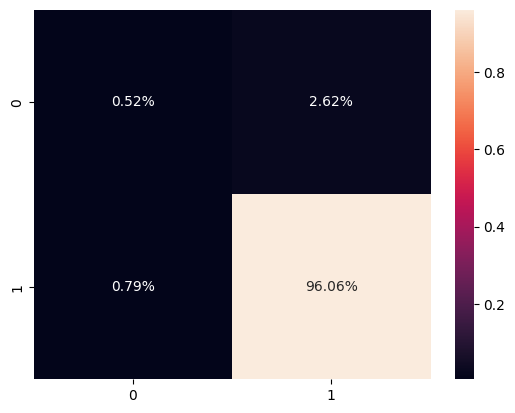

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix_cv_nb = confusion_matrix(y_test_cv, y_pred_cv_nb)
sns.heatmap(cf_matrix_cv_nb/np.sum(cf_matrix_cv_nb), annot=True, fmt='.2%')

In [39]:
## TD-IDF
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_tdidf, y_pred_tdidf_nb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC:',roc_auc)
print('Accuracy:',accuracy_score(y_test_tdidf, y_pred_tdidf_nb))
print('Precision:',precision_score(y_test_tdidf, y_pred_tdidf_nb))
print('Recall:',recall_score(y_test_tdidf, y_pred_tdidf_nb))
print('F1:',f1_score(y_test_tdidf, y_pred_tdidf_nb))

ROC_AUC: 0.5
Accuracy: 0.968538374717833
Precision: 0.968538374717833
Recall: 1.0
F1: 0.9840177739554219


<Axes: >

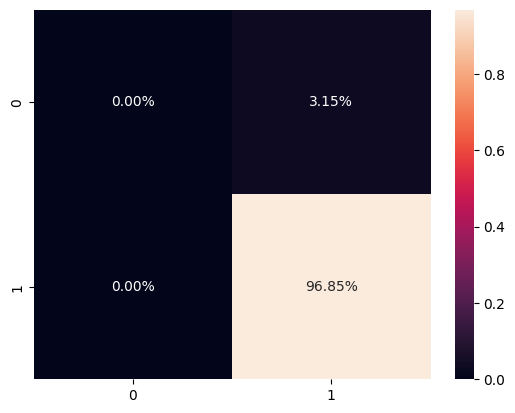

In [40]:
cf_matrix_tdidf_nb = confusion_matrix(y_test_tdidf, y_pred_tdidf_nb)
sns.heatmap(cf_matrix_tdidf_nb/np.sum(cf_matrix_tdidf_nb), annot=True, fmt='.2%')

**5) Hyperparameter Tuning** <br>
Conduct hyperparameter tuning to find the parameters that make better performances. <br>
<br>
In this case, find the best parameter that make a good **roc_auc** score. <br>
Only **`C`** parameter will be controlled in this step.

In [41]:
alpha = np.linspace(0.1, 1.0, 10, endpoint = True)
parameters = {'alpha': alpha}

Set the parameter grid to the classifier. <br>
In this hyperparameter tuning, we will focus on improving AUC scores.

In [42]:
from sklearn.model_selection import GridSearchCV
ld_cv_nb_hyper = GridSearchCV(MultinomialNB(), param_grid = parameters, cv=3, return_train_score=True, scoring= 'roc_auc')

Train a model again and print the best parameters

In [43]:
# count vectorization reviews
ld_cv_nb_hyper.fit(X_train_cv, y_train_cv)
print('Best model: %s' % str(ld_cv_nb_hyper.best_params_))

Best model: {'alpha': 0.8}


Train a model with the best parameters (`alpha` = 0.8) and evaluate measure scores.

In [44]:
# Train
ld_cv_nb_best = ld_cv_nb_hyper.best_estimator_
ld_cv_nb_best.fit(X_train_cv, y_train_cv)
y_pred_cv_nb_best = ld_cv_nb_best.predict(X_test_cv)

Unfortunately, the **roc_auc** score after hyperparameter tuning decreased by about 0.0001.

In [45]:
# Evaluate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_cv, y_pred_cv_nb_best)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC:',roc_auc)
print('Accuracy:',accuracy_score(y_test_cv, y_pred_cv_nb_best))
print('Precision:',precision_score(y_test_cv, y_pred_cv_nb_best))
print('Recall:',recall_score(y_test_cv, y_pred_cv_nb_best))
print('F1:',f1_score(y_test_cv, y_pred_cv_nb_best))

ROC_AUC: 0.5787353149628158
Accuracy: 0.9655756207674944
Precision: 0.9734019734019734
Recall: 0.991551347414421
F1: 0.9823928416798962


Also, the multinomialNB model with the hyperparameters can't divide positive and negative values exactly.

<Axes: >

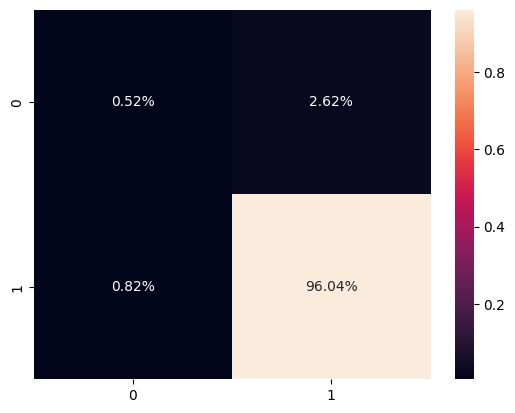

In [46]:
cf_matrix_cv_nb_best = confusion_matrix(y_test_cv, y_pred_cv_nb_best)
sns.heatmap(cf_matrix_cv_nb_best/np.sum(cf_matrix_cv_nb_best), annot=True, fmt='.2%')

Conduct hyperparameter tuning with the tdidf data sets.

In [47]:
from sklearn.model_selection import GridSearchCV
ld_tdidf_nb_hyper = GridSearchCV(MultinomialNB(), param_grid = parameters, cv=3, return_train_score=True, scoring= 'roc_auc')

In [48]:
# tdidf review
ld_tdidf_nb_hyper.fit(X_train_tdidf, y_train_tdidf)
print('Best model: %s' % str(ld_tdidf_nb_hyper.best_params_))

Best model: {'alpha': 0.2}


In [49]:
# Train
ld_tdidf_nb_best = ld_tdidf_nb_hyper.best_estimator_
ld_tdidf_nb_best.fit(X_train_tdidf, y_train_tdidf)
y_pred_tdidf_nb_best = ld_tdidf_nb_best.predict(X_test_tdidf)

In [50]:
# Evaluate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_tdidf, y_pred_tdidf_nb_best)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC:',roc_auc)
print('Accuracy:',accuracy_score(y_test_tdidf, y_pred_tdidf_nb_best))
print('Precision:',precision_score(y_test_tdidf, y_pred_tdidf_nb_best))
print('Recall:',recall_score(y_test_tdidf, y_pred_tdidf_nb_best))
print('F1:',f1_score(y_test_tdidf, y_pred_tdidf_nb_best))

ROC_AUC: 0.5
Accuracy: 0.968538374717833
Precision: 0.968538374717833
Recall: 1.0
F1: 0.9840177739554219


<Axes: >

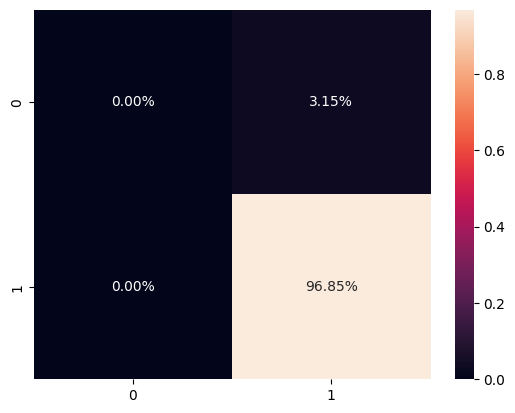

In [51]:
cf_matrix_tdidf_nb_best = confusion_matrix(y_test_tdidf, y_pred_tdidf_nb_best)
sns.heatmap(cf_matrix_tdidf_nb_best/np.sum(cf_matrix_tdidf_nb_best), annot=True, fmt='.2%')

**SVM (Support Vector Machine)**

**1) Import Required Classifier**

In [52]:
from sklearn.svm import SVC
ld_cv_svm = SVC()
ld_tdidf_svm = SVC()

**2) Train the model with default parameters** <br>
To get a baseline for hyperparameter tuning, train the model with its default parameter setting.

In [53]:
# count vectorization model
ld_cv_svm.fit(X_train_cv, y_train_cv)
y_pred_cv_svm = ld_cv_svm.predict(X_test_cv)

In [54]:
# TD-IDF reviews
ld_tdidf_svm.fit(X_train_tdidf, y_train_tdidf)
y_pred_tdidf_svm = ld_tdidf_svm.predict(X_test_tdidf)

**3) Check the Default Parameter**

In [55]:
print(str(ld_cv_svm.get_params()))

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [56]:
print(str(ld_tdidf_svm.get_params()))

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


**4) Evaluate the Models**

In [57]:
## count vectorization
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_cv, y_pred_cv_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC:',roc_auc)
print('Accuracy:',accuracy_score(y_test_cv, y_pred_cv_svm))
print('Precision:',precision_score(y_test_cv, y_pred_cv_svm))
print('Recall:',recall_score(y_test_cv, y_pred_cv_svm))
print('F1:',f1_score(y_test_cv, y_pred_cv_svm))

ROC_AUC: 0.5022421524663677
Accuracy: 0.9686794582392777
Precision: 0.968675038803443
Recall: 1.0
F1: 0.9840883027522936


<Axes: >

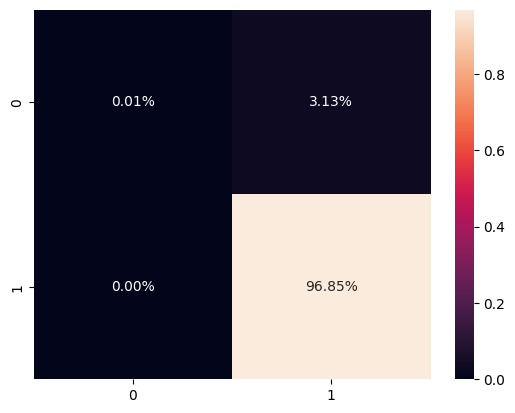

In [58]:
cf_matrix_cv_svm = confusion_matrix(y_test_cv, y_pred_cv_svm)
sns.heatmap(cf_matrix_cv_svm/np.sum(cf_matrix_cv_svm), annot=True, fmt='.2%')

In [59]:
## TD-IDF
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_tdidf, y_pred_tdidf_nb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC:',roc_auc)
print('Accuracy:',accuracy_score(y_test_tdidf, y_pred_tdidf_svm))
print('Precision:',precision_score(y_test_tdidf, y_pred_tdidf_svm))
print('Recall:',recall_score(y_test_tdidf, y_pred_tdidf_svm))
print('F1:',f1_score(y_test_tdidf, y_pred_tdidf_svm))

ROC_AUC: 0.5
Accuracy: 0.9683972911963883
Precision: 0.9685339353746296
Recall: 0.9998543335761108
F1: 0.9839449541284404


<Axes: >

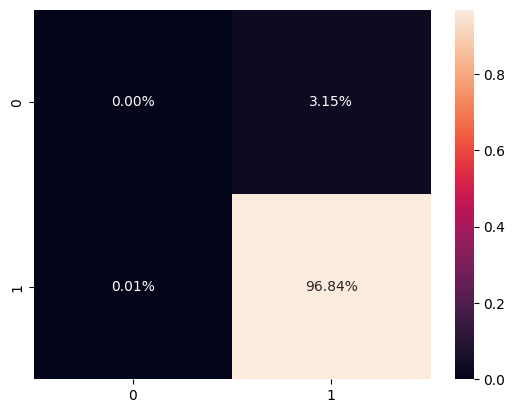

In [60]:
cf_matrix_tdidf_svm = confusion_matrix(y_test_tdidf, y_pred_tdidf_svm)
sns.heatmap(cf_matrix_tdidf_svm/np.sum(cf_matrix_tdidf_svm), annot=True, fmt='.2%')

**5) Hyperparameter Tuning** <br>
Conduct hyperparameter tuning to find the parameters that make better performances. <br>
<br>
In this case, find the best parameter that make a good **roc_auc** score. <br>
Use `kernel`, `c`, and `gamma` as the parameter for hyperparameter tuning.

In [61]:
kernel = ['linear', 'rbf']
C = [1,10,20,50,100]
gamma = [0.1, 0.01, 0.001]
parameters = {'kernel': kernel, 'C': C, 'gamma': gamma}

Set the parameter grid to the classifier. <br>
In this hyperparameter tuning, we will focus on improving AUC scores.

In [62]:
from sklearn.model_selection import GridSearchCV
ld_cv_svm_hyper = GridSearchCV(SVC(), param_grid = parameters, cv=3, return_train_score=True, scoring= 'roc_auc')

Train a model again and print the best parameters

In [63]:
# count vectorization reviews
ld_cv_svm_hyper.fit(X_train_cv, y_train_cv)
print('Best model: %s' % str(ld_cv_svm_hyper.best_params_))

Best model: {'C': 20, 'gamma': 0.1, 'kernel': 'linear'}


Train a model with the best parameters (`C` = 20, `gamma`= 0.1, `kernel` = linear) and evaluate measure scores.

In [64]:
# Train
ld_cv_svm_best = ld_cv_svm_hyper.best_estimator_
ld_cv_svm_best.fit(X_train_cv, y_train_cv)
y_pred_cv_svm_best = ld_cv_svm_best.predict(X_test_cv)

Unfortunately, the **roc_auc** score after hyperparameter tuning is the same as the previous roc_auc score.

In [65]:
# Evaluate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_cv, y_pred_cv_svm_best)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC:',roc_auc)
print('Accuracy:',accuracy_score(y_test_cv, y_pred_cv_svm_best))
print('Precision:',precision_score(y_test_cv, y_pred_cv_svm_best))
print('Recall:',recall_score(y_test_cv, y_pred_cv_svm_best))
print('F1:',f1_score(y_test_cv, y_pred_cv_svm_best))

ROC_AUC: 0.5
Accuracy: 0.968538374717833
Precision: 0.968538374717833
Recall: 1.0
F1: 0.9840177739554219


Also, the SVM model with the hyperparameters can't divide positive and negative values correctly.

<Axes: >

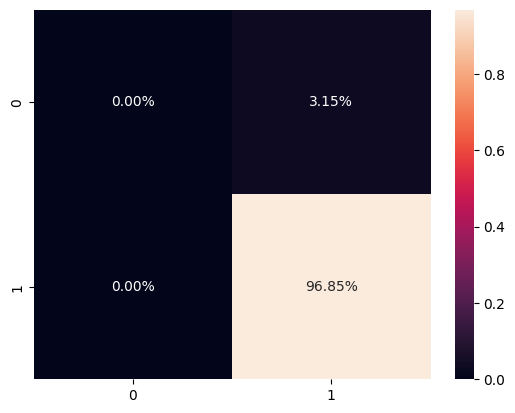

In [66]:
cf_matrix_cv_svm_best = confusion_matrix(y_test_cv, y_pred_cv_svm_best)
sns.heatmap(cf_matrix_cv_svm_best/np.sum(cf_matrix_cv_svm_best), annot=True, fmt='.2%')

### **5-4) Lie Detection** <br>

`Decision Tree` and `Random Forest` models are used for building the lie detection algorithm.

**Decision Tree**

**1) Import Required Classifier**

In [67]:
from sklearn.tree import DecisionTreeClassifier
ld_cv_dt = DecisionTreeClassifier()
ld_tdidf_dt = DecisionTreeClassifier()

**2) Train the model with default parameters** <br>
To get a baseline for hyperparameter tuning, train the model with its default parameter setting.

In [68]:
# count vectorization model
ld_cv_dt.fit(X_train_cv, y_train_cv)
y_pred_cv_dt = ld_cv_dt.predict(X_test_cv)

In [69]:
# TD-IDF reviews
ld_tdidf_dt.fit(X_train_tdidf, y_train_tdidf)
y_pred_tdidf_dt = ld_tdidf_dt.predict(X_test_tdidf)

**3) Check the Default Parameter**

In [70]:
print(str(ld_cv_dt.get_params()))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [71]:
print(str(ld_tdidf_dt.get_params()))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


**4) Evaluate the Models**

In [72]:
## count vectorization
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_cv, y_pred_cv_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC:',roc_auc)
print('Accuracy:',accuracy_score(y_test_cv, y_pred_cv_dt))
print('Precision:',precision_score(y_test_cv, y_pred_cv_dt))
print('Recall:',recall_score(y_test_cv, y_pred_cv_dt))
print('F1:',f1_score(y_test_cv, y_pred_cv_dt))

ROC_AUC: 0.5500971653836482
Accuracy: 0.9647291196388262
Precision: 0.9716241266219877
Recall: 0.992571012381646
F1: 0.9819858769275113


<Axes: >

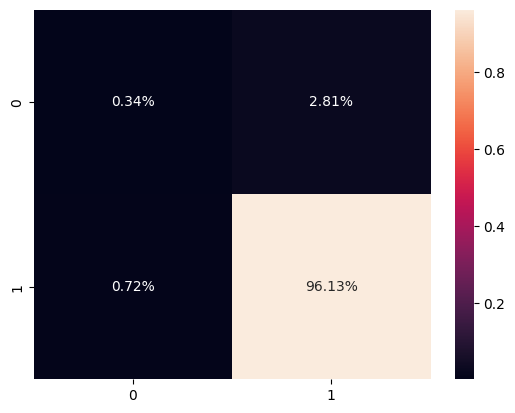

In [73]:
cf_matrix_cv_df = confusion_matrix(y_test_cv, y_pred_cv_dt)
sns.heatmap(cf_matrix_cv_df/np.sum(cf_matrix_cv_df), annot=True, fmt='.2%')

In [74]:
## TD-IDF
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_tdidf, y_pred_tdidf_nb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC:',roc_auc)
print('Accuracy:',accuracy_score(y_test_tdidf, y_pred_tdidf_dt))
print('Precision:',precision_score(y_test_tdidf, y_pred_tdidf_dt))
print('Recall:',recall_score(y_test_tdidf, y_pred_tdidf_dt))
print('F1:',f1_score(y_test_tdidf, y_pred_tdidf_dt))

ROC_AUC: 0.5
Accuracy: 0.9465293453724605
Precision: 0.97
Recall: 0.9749453750910415
F1: 0.9724664002905921


<Axes: >

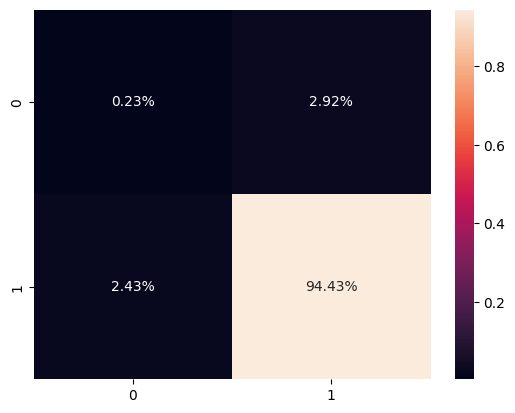

In [75]:
cf_matrix_tdidf_df = confusion_matrix(y_test_tdidf, y_pred_tdidf_dt)
sns.heatmap(cf_matrix_tdidf_df/np.sum(cf_matrix_tdidf_df), annot=True, fmt='.2%')

**Random Forest**

**1) Import Required Classifier**

In [76]:
from sklearn.ensemble import RandomForestClassifier
ld_cv_rf = RandomForestClassifier()
ld_tdidf_rf = RandomForestClassifier()

**2) Train the model with default parameters** <br>
To get a baseline for hyperparameter tuning, train the model with its default parameter setting.

In [77]:
# count vectorization model
ld_cv_rf.fit(X_train_cv, y_train_cv)
y_pred_cv_rf = ld_cv_rf.predict(X_test_cv)

In [78]:
# TD-IDF reviews
ld_tdidf_rf.fit(X_train_tdidf, y_train_tdidf)
y_pred_tdidf_rf = ld_tdidf_rf.predict(X_test_tdidf)

**3) Check the Default Parameter**

In [79]:
print(str(ld_cv_rf.get_params()))

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [80]:
print(str(ld_tdidf_rf.get_params()))

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


**4) Evaluate the Models**

In [81]:
## count vectorization
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_cv, y_pred_cv_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC:',roc_auc)
print('Accuracy:',accuracy_score(y_test_cv, y_pred_cv_rf))
print('Precision:',precision_score(y_test_cv, y_pred_cv_rf))
print('Recall:',recall_score(y_test_cv, y_pred_cv_rf))
print('F1:',f1_score(y_test_cv, y_pred_cv_rf))

ROC_AUC: 0.5298606370783104
Accuracy: 0.96755079006772
Precision: 0.9703672196228555
Recall: 0.9969410050983248
F1: 0.9834746371605116


<Axes: >

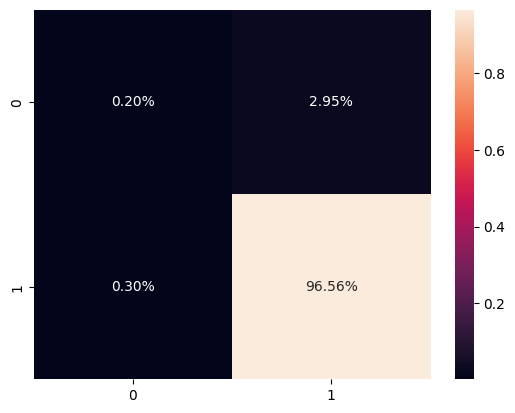

In [82]:
cf_matrix_cv_rf = confusion_matrix(y_test_cv, y_pred_cv_rf)
sns.heatmap(cf_matrix_cv_rf/np.sum(cf_matrix_cv_rf), annot=True, fmt='.2%')

In [83]:
## TD-IDF
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_tdidf, y_pred_tdidf_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC:',roc_auc)
print('Accuracy:',accuracy_score(y_test_tdidf, y_pred_tdidf_rf))
print('Precision:',precision_score(y_test_tdidf, y_pred_tdidf_rf))
print('Recall:',recall_score(y_test_tdidf, y_pred_tdidf_rf))
print('F1:',f1_score(y_test_tdidf, y_pred_tdidf_rf))

ROC_AUC: 0.5101025870487526
Accuracy: 0.9628950338600452
Precision: 0.9691586128482093
Recall: 0.9932993445010925
F1: 0.9810804978059132


<Axes: >

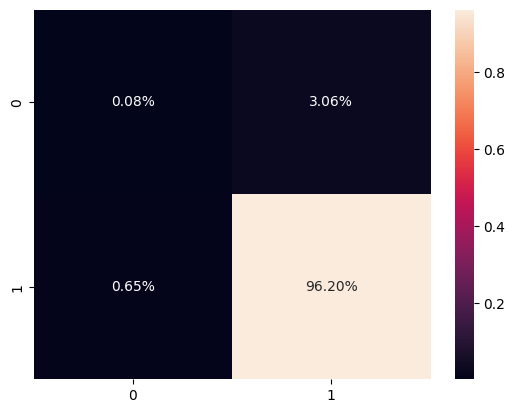

In [84]:
cf_matrix_tdidf_rf = confusion_matrix(y_test_tdidf, y_pred_tdidf_rf)
sns.heatmap(cf_matrix_tdidf_rf/np.sum(cf_matrix_tdidf_rf), annot=True, fmt='.2%')

## **6. Evaluation**
Check read_me in my github [Link]()